# Time Varying mass func
## The nonlocal breather

In [6]:
import sympy
import matplotlib.pyplot as plt
import numpy as np

from sympy import symbols, sin, cos, sinh, ln
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor, RicciTensor, RicciScalar

sympy.init_printing()

from celluloid import Camera
from IPython.display import Video


### Idea is to follow the Nov 1 2021 work where i used energy density to get a guess at a vacuum breather.

### Make time tick regular, waves get longer - example cos w (t - ln(r)) or similar, F is the fractional height of the waves



![alt-text](img/schwarschild.png "Schwarschild coords")


In [16]:
syms = sympy.symbols("t r theta phi")
G, M, F, a, w = sympy.symbols("G M F a w")
waveOutLn = F*sin(w*(syms[0] - ln(syms[1]*F)))
waveInLn  = F*sin(w*(syms[0] + ln(syms[1]*F)))

waveOut = F*sin(w*(syms[0] - syms[1]))
waveIn  = F*sin(w*(syms[0] + syms[1]))
a = M*(1 - waveOut - waveIn)
#v = syms[1]/ln(syms[1]*F)
v = syms[1]


mT = sympy.diff(a, syms[0])
print(mT)
mR = sympy.diff(a, syms[1])
print(mR)


# using metric values of schwarschild space-time
# a is schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]
list2d[0][0] = -(1 - 2*a/syms[1])

#list2d[0][0] = -1/(v*v)*1/(1 - 2*a/syms[1])

list2d[0][1] = 0
list2d[1][0] = 0
list2d[1][1] = 1/(1 - 2*a/syms[1]) 
list2d[2][2] = (syms[1])**2
list2d[3][3] = (syms[1])**2*(sympy.sin(syms[2]) ** 2)
sch = MetricTensor(list2d, syms)
sch.tensor()



M*(-F*w*cos(w*(-r + t)) - F*w*cos(w*(r + t)))
M*(F*w*cos(w*(-r + t)) - F*w*cos(w*(r + t)))


⎡2⋅M⋅(-F⋅sin(w⋅(-r + t)) - F⋅sin(w⋅(r + t)) + 1)                              
⎢─────────────────────────────────────────────── - 1                          
⎢                       r                                                     
⎢                                                                             
⎢                                                                             
⎢                         0                           ────────────────────────
⎢                                                       2⋅M⋅(-F⋅sin(w⋅(-r + t)
⎢                                                     - ──────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                         0                                                   
⎢                                                   

(t, r, theta, phi, F, M, w)


Text(0.5, 1.0, 'g_ab')

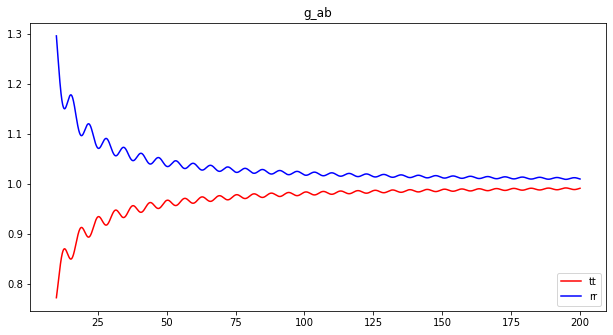

In [18]:
###Plot something
# first make the tensor into a function, printing 
args2, func2 = sch.tensor_lambdify()
print(args2) # these are the argument values 

t = 1

theta = 1
phi = 1
F = 0.1
M = 1
w = 1


#Make x values - which we will sub in for r 
x = np.arange(10.0, 200.0, 0.04)

# Call the functions
tt = func2(t,x,theta, phi, F, M, w)[0][0]*(-1)

tr = func2(t,x,theta, phi, F, M, w)[0][1]

rr = func2(t,x,theta, phi, F, M, w)[1][1] 

hh = func2(t,x,theta, phi, F, M, w)[2][2]/(x*x)

pp = func2(t,x,theta, phi, F, M, w)[3][3]/(x*x*sin(theta)*sin(theta))


fig2=plt.figure(figsize=(8, 4))
ax2=fig2.add_axes([0,2,1.0,1.0])
ax2.plot(x,tt, "red",label="tt")
ax2.plot(x,rr, "blue", label="rr")
#ax2.plot(x,tr)

#ax2.plot(x,hh)

#ax2.plot(x,pp)


ax2.legend(loc="lower right")



ax2.set_title("g_ab")




In [20]:
x = np.arange(20.0, 200.0, 0.05)


fig, ax = plt.subplots(figsize=(12, 8))


theta = 1
phi = 1
F = 0.3
M = 1
w = 1

#ax=fig.add_axes([0,2,1.0,1.0])

camera=Camera(fig)#Make a camera of the figure

for T in np.linspace(0,2*np.pi,250):
    #Our animation will have each frame be a different value of k from the list above  
    #print("T is %f" + str(T))
    tt = func2(T,x,theta, phi, F, M, w)[0][0]*(-1)
    rr = func2(T,x,theta, phi, F, M, w)[1][1] 

    ax.plot(x,tt, "red",label="tt")
    ax.plot(x,rr, "blue",label="rr")

#     ax.plot(*parametric_spiral(t_list,k=K),c=colours[int(500*(np.pi-K)/np.pi)])
    #For a given value of k, we'll plot our function with that k-value   
    camera.snap()

animation=camera.animate();#Make the animation
plt.close() #Stop the empty plot from displaying
animation.save('metric_animation.mp4',fps=250/20) #Save the animation-- notes below
Video("metric_animation.mp4") #Show the video you've just saved



#NOT Zero 


In [ ]:
einst = EinsteinTensor.from_metric(sch)
einst.simplify()
einst.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

In [ ]:
###Plot something
# first make the tensor into a function, printing 
args, func = einst.tensor_lambdify()
print(args) # these are the argument values 

theta = 1
phi = 1
F = 0.1
M = 1
w = 10
t = 1


#Make x values - which we will sub in for r 
x = np.arange(8.0, 100.0, 0.04)

# Call the functions
tt = func(t,x,theta, phi, F, M, w)[0][0]

tr = func(t,x,theta, phi, F, M, w)[0][1]

rr = func(t,x,theta, phi, F, M, w)[1][1] 

hh = func(t,x,theta, phi, F, M, w)[2][2]/(x*x)

pp = func(t,x,theta, phi, F, M, w)[3][3]/(x*x*sin(theta)*sin(theta))


fig=plt.figure(figsize=(10, 5))
ax=fig.add_axes([0,2,1.0,1.0])

#ax.plot(x,hh, "lightgrey",label="θθ", linewidth=6.0)
#ax.plot(x,pp, "black",label="φφ", linewidth=0.5)

ax.plot(x,tt, "-b", label="tt")
ax.plot(x,rr, "-g", label="rr")
#ax.plot(x,tr, "-r", label="tr")

ax.legend(loc="upper right")
ax.set_title("Einstien Tensor, G")
